<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


##### CRIM - tasa de delincuencia per cápita por ciudad
##### ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
##### INDUS - proporción de acres comerciales no minoristas por localidad.
##### CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)
##### NOX - concentración de óxidos nítricos (partes por 10 millones)
##### RM - número medio de habitaciones por vivienda
##### EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
##### DIS - distancias ponderadas a cinco centros de empleo de Boston
##### RAD - índice de accesibilidad a las autopistas radiales
##### IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
##### PTRATIO - proporción alumnos-profesor por ciudad
##### LSTAT - % más bajo de la población
##### MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

# Task 2
### For the "Median value of owner-occupied homes" provide a boxplot

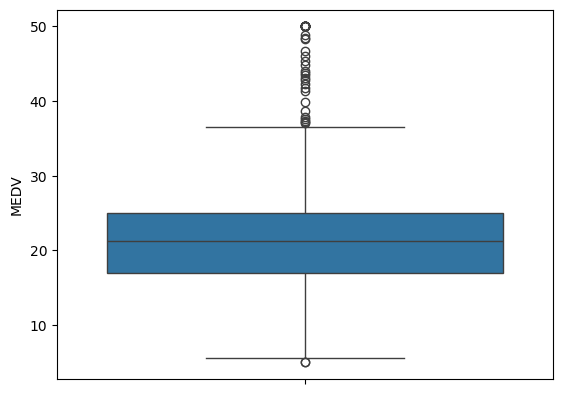

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.show()

### Provide a  bar plot for the Charles river variable

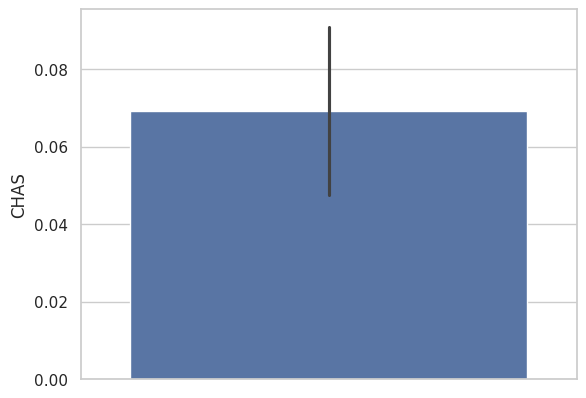

In [8]:
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)
plt.show()

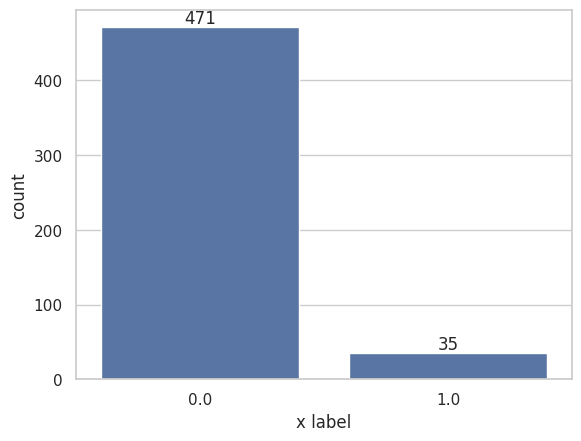

In [9]:
ax = sns.countplot(x='CHAS', data=boston_df)
ax.bar_label(ax.containers[0])
plt.xlabel('x label')
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

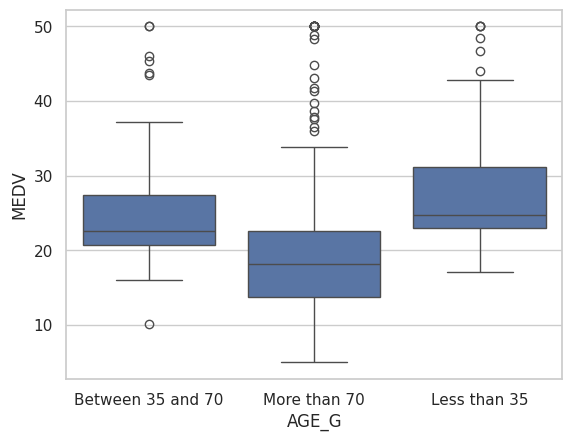

In [10]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_G'] = 'Less than 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_G'] = 'Between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_G'] = 'More than 70'

ax = sns.boxplot(x='AGE_G', y='MEDV', data=boston_df)
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

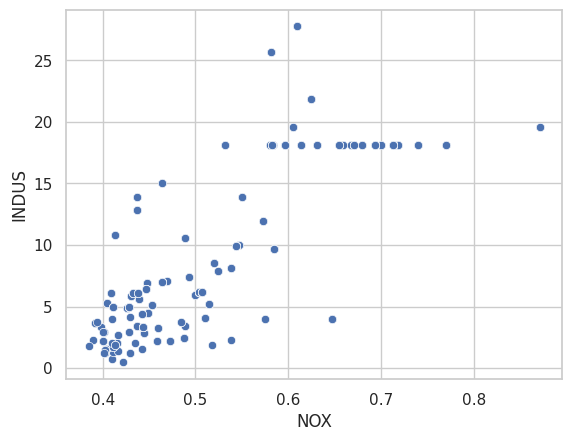

In [11]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

### Create a histogram for the pupil to teacher ratio variable

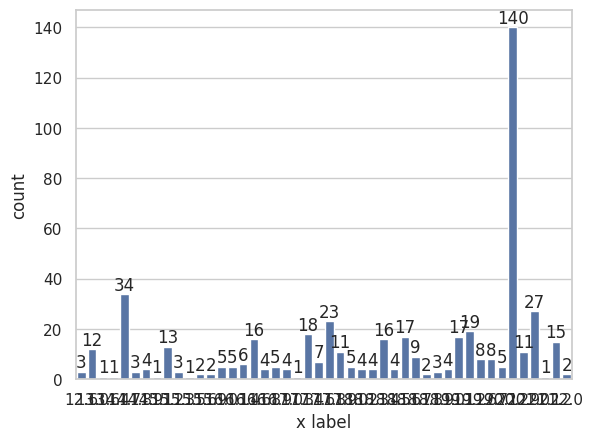

In [12]:
ax = sns.countplot(x='PTRATIO', data=boston_df)
ax.bar_label(ax.containers[0])
plt.xlabel('x label')
plt.show()

# Task 3
### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [14]:
scipy.stats.levene(boston_df[boston_df['AGE_G'] == 'Less than 35']['MEDV'],
                   boston_df[boston_df['AGE_G'] == 'Between 35 and 70']['MEDV'], 
                   boston_df[boston_df['AGE_G'] == 'More than 70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [15]:
rank1 = boston_df[boston_df['AGE_G'] == 'Less than 35']['MEDV']
rank2 = boston_df[boston_df['AGE_G'] == 'Between 35 and 70']['MEDV']
rank3 = boston_df[boston_df['AGE_G'] == 'More than 70']['MEDV']

In [16]:
f_statistic, p_value = scipy.stats.f_oneway(rank1, rank2, rank3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)? (Pearson Correlation)

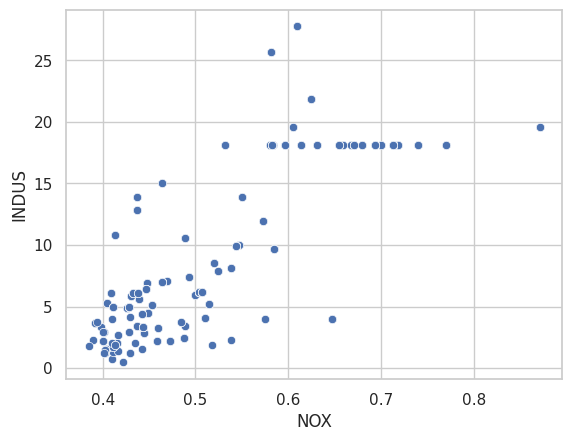

In [17]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value is less tahan 0.05, we reject the Null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)? (Regression analysis)

In [19]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.21e-08
Time:                        15:50:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, we reject the null hypothesis as there is evidence that there is a difference in median value of owner occupied homes based on weighted distance to the five Boston employment centres.